# **Problem Statement:**

1. A credit card is a small thin plastic or fiber card that incorporates information about the person such as a picture or signature and the person’s name on it to charge purchases and services to his linked  account. Charges are debited regularly. Nowadays, card data is read by ATMs, swiping machines, store readers, banks and online transactions.

2. Each card has a unique card number which is very important. Its security mainly relies on the physical security of the card and also the privacy of the
credit card number. There is a rapid growth in credit card transactions which has led to substantial growth in scam cases.

3. Credit card fraud is expanding heavily because fraud financial loss is increasing drastically. Multiple data mining and statistical techniques are used to catch fraud. Therefore the detection of fraud using efficient and secured methods are very important.


**Tasks To Be Performed:**

1. Load the dataset using the pandas module.

2. Perform missing value analysis on the dataset.

3. From the dataset, calculate the number of genuine transactions, number of fraud transactions and the percentage of fraud transactions.

4. Using the visualization module, visualize the genuine and fraudulent transactions using a bar graph.

5. Using the Standard Scaler module, normalize the amount column and store the new values in the NormalizedAmount column.
6. Split the dataset in train and test set and have a 70:30 split ratio for the model.
7. Now use a decision tree and random forest model for training on top of the train set.
8. Compare the predictions of both models using predict().
9. Compare the accuracy of both models using score().
10. Check the performance matrix of both models and compare which model is having the highest performance.

In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

In [3]:
# Load the dataset
df = pd.read_csv('Creditcard.csv')

In [22]:
# Remove rows with NaN values
df.dropna(inplace=True)

In [23]:
# Perform missing value analysis
print(df.isnull().sum())

id                  0
V1                  0
V2                  0
V3                  0
V4                  0
V5                  0
V6                  0
V7                  0
V8                  0
V9                  0
V10                 0
V11                 0
V12                 0
V13                 0
V14                 0
V15                 0
V16                 0
V17                 0
V18                 0
V19                 0
V20                 0
V21                 0
V22                 0
V23                 0
V24                 0
V25                 0
V26                 0
V27                 0
V28                 0
Amount              0
Class               0
NormalizedAmount    0
dtype: int64


In [24]:
# Calculate the number of genuine and fraud transactions
genuine = df[df['Class'] == 0]
fraud = df[df['Class'] == 1]
print('Number of Genuine Transactions: ', len(genuine))
print('Number of Fraud Transactions: ', len(fraud))

Number of Genuine Transactions:  87955
Number of Fraud Transactions:  206


In [25]:
# Calculate the percentage of fraud transactions
percentage = (len(fraud)/len(df))*100
print('Percentage of Fraud Transactions: ', percentage)


Percentage of Fraud Transactions:  0.2336634112589467


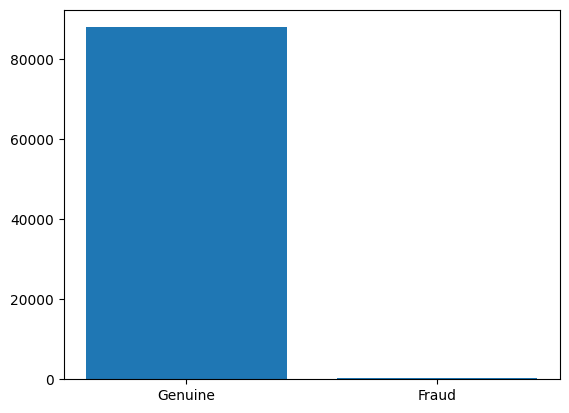

In [26]:
# Visualize the transactions
plt.bar(['Genuine', 'Fraud'], [len(genuine), len(fraud)])
plt.show()

In [27]:
# Normalize the amount column
scaler = StandardScaler()
df['NormalizedAmount'] = scaler.fit_transform(df['Amount'].values.reshape(-1,1))

In [28]:
# Split the dataset into train and test sets
X = df.drop(['Class'], axis=1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [29]:
# Train a Decision Tree model
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)


DecisionTreeClassifier()

In [30]:
# Train a Random Forest model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [32]:
# Compare the predictions
dt_predictions = dt.predict(X_test)
rf_predictions = rf.predict(X_test)

In [33]:
# Compare the accuracy
dt_accuracy = accuracy_score(y_test, dt_predictions)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print('Decision Tree Accuracy: ', dt_accuracy)
print('Random Forest Accuracy: ', rf_accuracy)

Decision Tree Accuracy:  0.9990169760671481
Random Forest Accuracy:  0.9995084880335741


In [34]:
# Check the performance matrix
dt_matrix = confusion_matrix(y_test, dt_predictions)
rf_matrix = confusion_matrix(y_test, rf_predictions)
print('Decision Tree Performance Matrix: \n', dt_matrix)
print('Random Forest Performance Matrix: \n', rf_matrix)

Decision Tree Performance Matrix: 
 [[26371    12]
 [   14    52]]
Random Forest Performance Matrix: 
 [[26382     1]
 [   12    54]]
